In [1]:
from parameters import *
from functions import *
from PDE_solutions import *
walks = 5000
N = 200

# Antithetic variable

In [2]:
def AntVar(X0, N, T):
    ''' X0: initial position
        N: number of steps
        T: Final time
        Generate 2 different chains, in one we update using +Z, in the other one -Z. Where Z is the standard normal'''
    X_A = [X0]
    X_B = [X0]
    r_A = R + 1000
    r_B = R + 1000
    
    dt = T/N
    finalT_A = 0
    finalT_B = 0
    
    for i in range(N-1):
        Z = norm.rvs(size=2)
        
        #update A
        if(r_A > R):
            X_temp = X_A[-1] + u(X_A[-1]) * dt + sigma * np.sqrt(dt) * Z 
            X_A.append(X_temp)
            finalT_A = finalT_A + dt
            r_A = np.sqrt( X_temp[0]**2 + X_temp[1]**2 )
        
        #update B
        if(r_B > R):
            X_temp = X_B[-1] + u(X_B[-1]) * dt - sigma * np.sqrt(dt) * Z #minus!!
            X_B.append(X_temp)
            finalT_B = finalT_B + dt
            r_B = np.sqrt( X_temp[0]**2 + X_temp[1]**2 )
            
        

    
    return np.asarray(X_A), finalT_A, np.asarray(X_B), finalT_B 

# Check if there is some NEGATIVE correlation(heuristic)

0.9950000000000008
0.9950000000000008


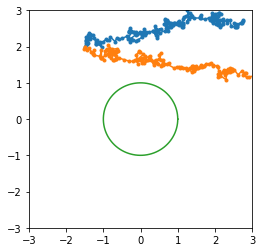

In [5]:
X_A, finalTimeA, X_B, finalTimeB = AntVar(X0, N, T)

#plots the walk
plt.figure(figsize=[4,4])
X_A = X_A.T
plt.plot(X_A[0,:],X_A[1,:], '.-')
X_B = X_B.T
plt.plot(X_B[0,:],X_B[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTimeA)
print(finalTimeB)

In [4]:
polluted = np.zeros(walks)
np.random.seed(SEED) #scipy is based on the numpy seed

start = time.time()
for w in range(int(walks/2)):
    if (w%1000 == 0):
        print('Current walk: ', w*2 )
    _, finalTimeA, _, finalTimeB = AntVar(X0, N, T)
    if finalTimeA < T - 1e-2:
            polluted[2*w] = 1
    if finalTimeB < T - 1e-2:
            polluted[2*w+1] = 1
end = time.time()

confidence = 0.95
mean = polluted.mean()
std = np.std(polluted, ddof = 1)
LB, UB = CI(mean, std, walks, confidence)

print(f'\n\n\nNumber of simulations: {walks}. Time needed = {end - start}')
print(f'Estimated variance: {std}')
print(f'The estimated probability at {X0} is: {mean} (using MC), {PDEProb} (using the PDE)')
print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')


Current walk:  0
Current walk:  2000
Current walk:  4000



Number of simulations: 5000. Time needed = 53.344295024871826
Estimated variance: 0.2901809797354059
The estimated probability at [-1.5, 2.0] is: 0.0928 (using MC), 0.0980219 (using the PDE)
Confidence interval: [ 0.0928 +- 0.008045206499714116 ]	with P = 0.95%
